## Implementation of CNN in Keras Dataset
#### Classification Problem

Using mnist dataset from Keras 

In this project we would try to build an Convolusion Neural Network that would predict the digits using the pixels of the images of the digits. The pixels of the images will be used as the input feature and the digits associated with the images will be used as the target feature. The images of the mnist dataset are gray scale image with no color depth.  

Using Lenet Architecture

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.warn('ignore')

/tmp/ipykernel_4606/1884103834.py:8: UserWarning: ignore
  warnings.warn('ignore')


In [3]:
data = tf.keras.datasets.mnist

Train-Test Split

In [4]:
(x_train_full, y_train_full), (x_test, y_test) = data.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
print('The number of output lables of training data is', len(y_train_full[:10]))

The number of output lables of training data is 10


In [6]:
x_train_full = x_train_full.astype('float32')
x_test = x_test.astype('float32')

In [7]:
## Splitting the data into training, validation and test data and also scaling the input data
## Each of the pixel value ranges from 0 to 255. So we can divide the input features of the training, validation, and test data by 255 in order to scale it down between 0 and 1.
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test/255

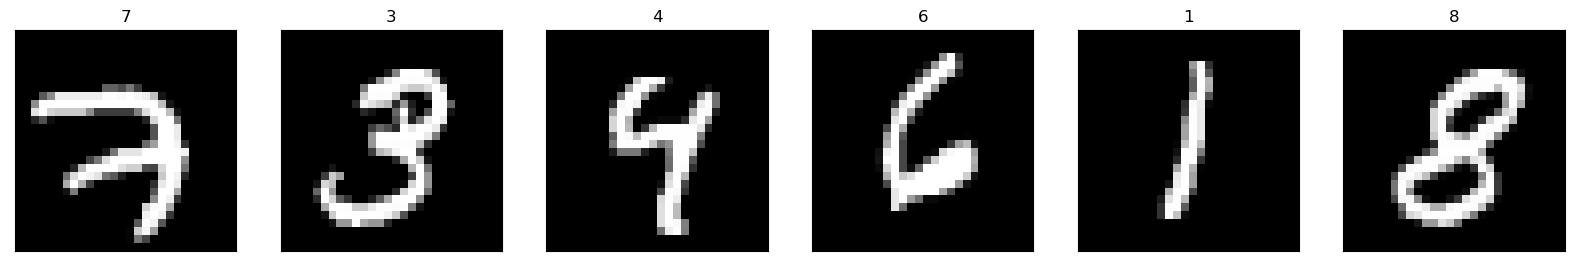

In [8]:
## Visualizing the first six images of the training data
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [9]:
print('Number of training samples :', len(x_train))
print('Number of validation samples :', len(x_valid))
print('Number of test samples :', len(x_test))

Number of training samples : 55000
Number of validation samples : 5000
Number of test samples : 10000


In [10]:
## Reshaping the images

print('Shape of the image', x_train.shape) ## Original shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) 
print('Shape of the training image', x_train.shape)

x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1) 
print('Shape of the validation image', x_valid.shape)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1) 
print('Shape of the test image', x_test.shape)

Shape of the image (55000, 28, 28)
Shape of the training image (55000, 28, 28, 1)
Shape of the validation image (5000, 28, 28, 1)
Shape of the test image (10000, 28, 28, 1)


So we have converted the images from 3D into 4D (number of samples * height * width * color depth). Since it is a gray-scale image, the colour depth is 1.

Model Building

In [11]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

model = Sequential()

## First layer of convolusion
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

## Second layer of convolusion
model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  ## flattning the image to convert the final features into a 1D array
          
model.add(Dense(64, activation='relu'))  ## dense layers

tf.keras.layers.Dropout(0.2)

tf.keras.layers.BatchNormalization()
          
model.add(Dense(10, activation='softmax')) ## Final output layer
          
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

CallBack Functions

In [12]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, restore_best_weights=True)

In [13]:
checkpoint_path = 'Model_Ckeckpoint.h5'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_best_only=True)

Model Training

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size=64,  epochs=10, validation_data=(x_valid, y_valid), callbacks=[early_stopping_callback, checkpoint_callback], verbose=2, shuffle=True)

Epoch 1/10
860/860 - 9s - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0352 - val_accuracy: 0.9916 - 9s/epoch - 11ms/step
Epoch 2/10
860/860 - 9s - loss: 0.0065 - accuracy: 0.9981 - val_loss: 0.0418 - val_accuracy: 0.9906 - 9s/epoch - 10ms/step
Epoch 3/10
860/860 - 9s - loss: 0.0062 - accuracy: 0.9981 - val_loss: 0.0419 - val_accuracy: 0.9904 - 9s/epoch - 10ms/step
Epoch 4/10
860/860 - 9s - loss: 0.0049 - accuracy: 0.9986 - val_loss: 0.0435 - val_accuracy: 0.9908 - 9s/epoch - 10ms/step
Epoch 5/10
860/860 - 9s - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0445 - val_accuracy: 0.9912 - 9s/epoch - 11ms/step
Epoch 6/10
860/860 - 9s - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0461 - val_accuracy: 0.9920 - 9s/epoch - 11ms/step


So we have saved our best model which was at the 6th epoch as it has the minimum validation loss and the corresponding validation_accuracy of 99.20%. Now we would train our neural network using the best model.

In [19]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.009323,0.996945,0.035219,0.9916
1,0.006516,0.998127,0.041789,0.9906
2,0.006191,0.998073,0.041927,0.9904
3,0.004875,0.998618,0.043496,0.9908
4,0.003427,0.999000,0.044461,0.9912
5,0.002372,0.999382,0.046075,0.9920


<AxesSubplot: >

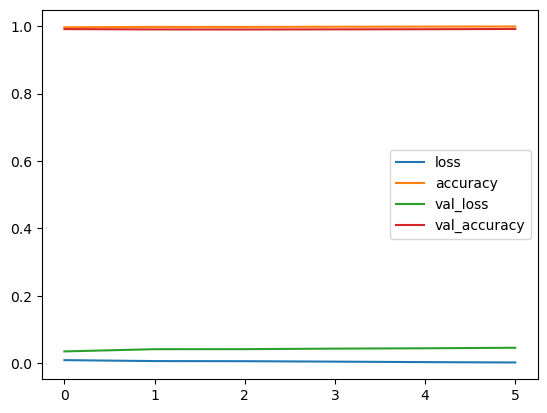

In [20]:
pd.DataFrame(history.history).plot()

Loading Checkpoint Model

In [21]:
checkpoint_model = tf.keras.models.load_model(checkpoint_path)

In [22]:
score = checkpoint_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0313 - accuracy: 0.9920


In [23]:
print('model accuracy =', score[1]*100)

model accuracy = 99.19999837875366


In [27]:
x_unknown = x_test[:10]

In [28]:
actual = y_test[:10]

In [29]:
y_prob = checkpoint_model.predict(x_unknown)
y_prob.round(2) ## Rounding-off the probability to two digits

1/1 [==============================] - 0s 27ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.75, 0.18, 0.  , 0.07, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]],
      dtype=float32)

In [30]:
y_prob

array([[8.06196748e-16, 2.51257500e-12, 1.71735515e-10, 5.59269020e-11,
        6.59525629e-11, 1.19982027e-13, 3.96699949e-22, 9.99999940e-01,
        8.16802595e-15, 1.98483363e-08],
       [4.35169900e-10, 1.62483069e-10, 9.99999940e-01, 1.45283377e-15,
        9.12370316e-16, 2.06317828e-21, 1.31609723e-09, 1.58470695e-15,
        6.91989174e-12, 8.34206751e-15],
       [2.01244251e-12, 9.99999225e-01, 3.86461002e-12, 3.71665487e-14,
        4.31938588e-07, 9.87885381e-12, 1.28482155e-10, 1.17125936e-07,
        9.54938102e-08, 5.51233192e-09],
       [9.99999940e-01, 1.09090214e-16, 3.80635454e-11, 3.59984395e-13,
        5.35400505e-15, 1.75249572e-11, 1.72242753e-09, 2.61929339e-10,
        3.49834779e-11, 1.85394611e-09],
       [1.06710203e-12, 5.98580566e-14, 6.47427329e-14, 5.49627397e-16,
        9.99999940e-01, 5.37564524e-12, 8.52336051e-15, 1.11645979e-11,
        4.16627774e-11, 3.49012872e-08],
       [8.14123888e-13, 9.99998391e-01, 1.44049443e-12, 1.38280511e-15,
   

In [31]:
y_predict = np.argmax(y_prob, axis=-1)

In [32]:
y_predict

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [33]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

So we can see that for the first 10 test images, the model has done accurate predictions. Hence we can say that it is a good model. 